# Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.

## Tópicos:
- Python
- Pandas
- Sklearn
- Regression
- Requisitos

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Leitura  e visualização dos dados

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


#### Dimensões dos dados

In [5]:
# Dimensões dos dados de treino

train.shape

(13730, 167)

In [6]:
# Dimensão dos dados de teste

test.shape

(4576, 47)

#### Sumarização dos dados de treino

In [7]:
train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Drop na coluna Unnamed dos dados de treino

In [8]:
train.drop(columns = ['Unnamed: 0'], inplace = True)

#### Observo as correlações presentes

In [9]:
train.corr()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,0.025402,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,0.025822,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,-0.253403,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
TP_ESTADO_CIVIL,NaN,0.020813,0.020947,0.533462,1.000000,0.004950,-0.012160,-0.000046,0.000243,-0.099077,...,-0.017455,-0.009670,-0.016354,-0.002580,0.025840,0.002294,-0.014725,-0.066346,-0.022736,0.108771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,NaN,-0.013479,-0.013647,-0.003569,0.002294,0.086642,0.032588,-0.024174,-0.024201,0.001767,...,0.220839,0.225791,0.245757,0.202230,0.387722,1.000000,0.496678,0.254418,0.270380,0.187921
Q038,NaN,-0.032710,-0.032467,-0.035306,-0.014725,0.069298,0.024112,-0.038666,-0.038305,0.080592,...,0.159887,0.223508,0.215767,0.142610,0.378421,0.496678,1.000000,0.374424,0.259947,0.219529
Q039,NaN,-0.094862,-0.094113,-0.069973,-0.066346,0.046830,0.011327,-0.097273,-0.096666,0.019877,...,0.144264,0.206979,0.189252,0.225724,0.270343,0.254418,0.374424,1.000000,0.305357,0.262031
Q040,NaN,-0.077456,-0.076838,-0.010988,-0.022736,0.053556,0.014847,-0.081490,-0.080963,0.051951,...,0.215292,0.176028,0.243190,0.179292,0.177025,0.270380,0.259947,0.305357,1.000000,0.306438


#### Seleciono as features

In [10]:
train_features = ['NU_INSCRICAO',
                  'NU_NOTA_CN',
                  'NU_NOTA_CH',
                  'NU_NOTA_LC',
                  'NU_NOTA_COMP1',
                  'NU_NOTA_COMP2',
                  'NU_NOTA_COMP3', 
                  'NU_NOTA_COMP4',
                  'NU_NOTA_COMP5',
                  'NU_NOTA_REDACAO',
                  'NU_NOTA_MT'] 

test_features = ['NU_NOTA_CN',
                 'NU_NOTA_CH',
                 'NU_NOTA_LC',
                 'NU_NOTA_REDACAO',
                 'NU_NOTA_COMP1',
                 'NU_NOTA_COMP2',
                 'NU_NOTA_COMP3',
                 'NU_NOTA_COMP4',
                 'NU_NOTA_COMP5']

#### Mapa de calor

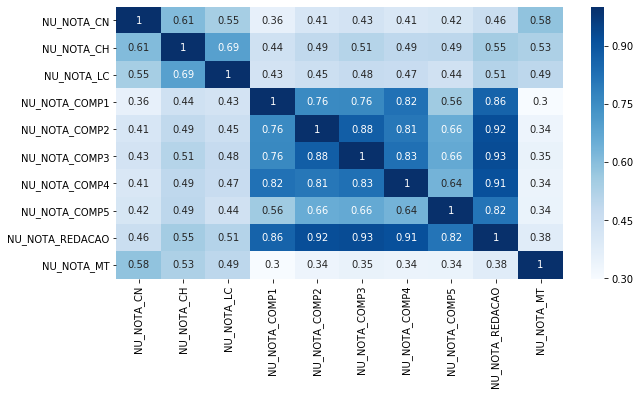

In [11]:
%matplotlib inline

corr = train[train_features].corr()
plt.subplots(figsize = (10, 5))
sns.heatmap(corr, annot = True, annot_kws = {"size": 10}, linecolor= 'black', cmap= 'Blues')

#### Dados nulos/faltantes

In [12]:
train.isna().sum()

NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
                          ..
Q046                       0
Q047                       0
Q048                       0
Q049                       0
Q050                       0
Length: 166, dtype: int64

In [13]:
print(f'Há {train.isna().sum().sum()} dados nulos/faltantes nos dados de treino' )

Há 253786 dados nulos/faltantes nos dados de treino


In [14]:
train[train_features].isna().sum()

NU_INSCRICAO          0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
NU_NOTA_MT         3597
dtype: int64

In [15]:
test[test_features].isna().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

#### Tratamento dos dados

In [16]:
train[train_features] = train[train_features].fillna(0) 
test[test_features] = test[test_features].fillna(0)

#### Sklearn LinearRegression

In [17]:
y_train = train['NU_NOTA_MT']

x_train = train[test_features]
x_test = test[test_features]

In [18]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train) # fit somente nos dados de treino
x_test = sc.transform(x_test) # transform nos dados de teste

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = reg.predict(x_test)

result = pd.DataFrame()
result['NU_INSCRICAO'] = test['NU_INSCRICAO']
result['NU_NOTA_MT'] = np.around(y_pred, 2)

result.to_csv('answer.csv', index = False, header = True)

In [22]:
result.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,424.21
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,482.64
2,b38a03232f43b11c9d0788abaf060f7366053b6d,562.78
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-2.76
4,715494628a50142ce8cb17191cfe6d0f3cae0934,547.26


In [23]:
result.shape

(4576, 2)

In [24]:
# Métricas

In [25]:
reg.score(x_train, y_train)

0.9026723873062031

In [26]:
reg.coef_

array([ 74.92106076, -30.16234974, 156.03510184,   3.80516076,
         3.05268348,   3.51827721,   1.52002236,   5.8056474 ,
         4.39919124])